1. CARREGANDO E PREPARANDO OS DADOS

Carregando dataset Titanic...

Dimensões do dataset: (887, 8)

Primeiras 5 linhas:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0          

2025-06-10 10:39:00,131 lightautoml.automl.presets.base INFO Stdout logging level is INFO.


[10:39:00] Task: binary



2025-06-10 10:39:00,133 lightautoml.automl.presets.base INFO Task: binary



[10:39:00] Start automl preset with listed constraints:


2025-06-10 10:39:00,141 lightautoml.automl.presets.base INFO Start automl preset with listed constraints:


[10:39:00] - time: 300.00 seconds


2025-06-10 10:39:00,147 lightautoml.automl.presets.base INFO - time: 300.00 seconds


[10:39:00] - CPU: 4 cores


2025-06-10 10:39:00,154 lightautoml.automl.presets.base INFO - CPU: 4 cores


[10:39:00] - memory: 16 GB



2025-06-10 10:39:00,168 lightautoml.automl.presets.base INFO - memory: 16 GB



[10:39:00] Train data shape: (709, 5)



2025-06-10 10:39:00,179 lightautoml.reader.base INFO Train data shape: (709, 5)

2025-06-10 10:39:37,419 lightautoml.reader.base INFO3 Feats was rejected during automatic roles guess: []


[10:39:37] Layer 1 train process start. Time left 262.76 secs


2025-06-10 10:39:37,419 lightautoml.automl.base INFO Layer 1 train process start. Time left 262.76 secs
2025-06-10 10:39:37,504 lightautoml.ml_algo.boost_lgbm INFO3 Training until validation scores don't improve for 200 rounds
2025-06-10 10:39:37,547 lightautoml.ml_algo.boost_lgbm INFO3 [100]	valid's auc: 0.833229
2025-06-10 10:39:37,611 lightautoml.ml_algo.boost_lgbm INFO3 [200]	valid's auc: 0.849739
2025-06-10 10:39:37,670 lightautoml.ml_algo.boost_lgbm INFO3 [300]	valid's auc: 0.861755
2025-06-10 10:39:37,723 lightautoml.ml_algo.boost_lgbm INFO3 [400]	valid's auc: 0.868234
2025-06-10 10:39:37,782 lightautoml.ml_algo.boost_lgbm INFO3 [500]	valid's auc: 0.872623
2025-06-10 10:39:37,853 lightautoml.ml_algo.boost_lgbm INFO3 [600]	valid's auc: 0.875131
2025-06-10 10:39:37,916 lightautoml.ml_algo.boost_lgbm INFO3 [700]	valid's auc: 0.875758
2025-06-10 10:39:37,980 lightautoml.ml_algo.boost_lgbm INFO3 [800]	valid's auc: 0.879101
2025-06-10 10:39:38,038 lightautoml.ml_algo.boost_lgbm INFO3 

[10:39:38] Selector_LightGBM fitting and predicting completed


2025-06-10 10:39:38,823 lightautoml.ml_algo.base INFO Selector_LightGBM fitting and predicting completed


[10:39:38] Start fitting Lvl_0_Pipe_0_Mod_0_LightGBM ...


2025-06-10 10:39:38,851 lightautoml.ml_algo.base INFO Start fitting Lvl_0_Pipe_0_Mod_0_LightGBM ...
2025-06-10 10:39:38,857 lightautoml.ml_algo.base DEBUG Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 4, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42, 'verbose_eval': 100}
2025-06-10 10:39:38,861 lightautoml.ml_algo.base INFO2 ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LightGBM =====
2025-06-10 10:39:38,880 lightautoml.ml_algo.boost_lgbm INFO3 Training until validation scores don't improve for 200 rounds
2025-06-10 10:39:38,937 lightautoml.ml_algo.boost_lgbm INFO3 [100]	valid's auc: 0.849007
2025-06-10 10:39:38,984 lightautoml.ml_algo.boost_lgbm INFO3 [200]	valid's auc: 0.856008
2025-06-10

[10:39:42] Fitting Lvl_0_Pipe_0_Mod_0_LightGBM finished. score = 0.8667120341432267


2025-06-10 10:39:42,718 lightautoml.ml_algo.base INFO Fitting Lvl_0_Pipe_0_Mod_0_LightGBM finished. score = 0.8667120341432267


[10:39:42] Lvl_0_Pipe_0_Mod_0_LightGBM fitting and predicting completed


2025-06-10 10:39:42,722 lightautoml.ml_algo.base INFO Lvl_0_Pipe_0_Mod_0_LightGBM fitting and predicting completed


[10:39:42] Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ... Time budget is 35.86 secs


2025-06-10 10:39:42,727 lightautoml.ml_algo.tuning.optuna INFO Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ... Time budget is 35.86 secs
Optimization Progress:   0%|          | 0/101 [00:00<?, ?it/s]2025-06-10 10:39:42,748 optuna.storages._in_memory INFO A new study created in memory with name: no-name-dccd5beb-a32b-456b-aba9-71d79655fd05
2025-06-10 10:39:42,779 lightautoml.ml_algo.boost_lgbm INFO3 Training until validation scores don't improve for 200 rounds
2025-06-10 10:39:42,837 lightautoml.ml_algo.boost_lgbm INFO3 [100]	valid's auc: 0.862905
2025-06-10 10:39:42,920 lightautoml.ml_algo.boost_lgbm INFO3 [200]	valid's auc: 0.868339
2025-06-10 10:39:42,992 lightautoml.ml_algo.boost_lgbm INFO3 [300]	valid's auc: 0.87534
2025-06-10 10:39:43,074 lightautoml.ml_algo.boost_lgbm INFO3 [400]	valid's auc: 0.880146
2025-06-10 10:39:43,158 lightautoml.ml_algo.boost_lgbm INFO3 [500]	valid's auc: 0.884117
2025-06-10 10:39:43,241 lightautoml.ml_algo.boost_lgbm INFO3 [6

[10:40:19] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM completed



2025-06-10 10:40:19,230 lightautoml.ml_algo.tuning.optuna INFO Hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM completed
2025-06-10 10:40:19,237 lightautoml.ml_algo.tuning.optuna INFO2 The set of hyperparameters {'feature_fraction': 0.9148909829190608, 'num_leaves': 104, 'bagging_fraction': 0.9535844830432498, 'min_sum_hessian_in_leaf': 0.020138930393677246, 'reg_alpha': 4.892553835343549e-05, 'reg_lambda': 5.1442030017602385e-08}
 achieve 0.8918 auc


[10:40:19] Start fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ...


2025-06-10 10:40:19,238 lightautoml.ml_algo.base INFO Start fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ...
2025-06-10 10:40:19,240 lightautoml.ml_algo.base DEBUG Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 104, 'feature_fraction': 0.9148909829190608, 'bagging_fraction': 0.9535844830432498, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 4.892553835343549e-05, 'reg_lambda': 5.1442030017602385e-08, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 4, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'verbose_eval': 100, 'min_sum_hessian_in_leaf': 0.020138930393677246}
2025-06-10 10:40:19,246 lightautoml.ml_algo.base INFO2 ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM =====
2025-06-10 10:40:19,264 lightautoml.ml_algo.boost_lgbm INFO3 Training until validation scores don't improve for 100 rounds
2025-06-10 10:40:19,357 lightautoml.ml_algo.boost_lgbm IN

[10:40:20] Fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM finished. score = 0.8872240145175925


2025-06-10 10:40:20,363 lightautoml.ml_algo.base INFO Fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM finished. score = 0.8872240145175925


[10:40:20] Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM fitting and predicting completed


2025-06-10 10:40:20,368 lightautoml.ml_algo.base INFO Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM fitting and predicting completed


[10:40:20] Start fitting Lvl_0_Pipe_0_Mod_2_CatBoost ...


2025-06-10 10:40:20,383 lightautoml.ml_algo.base INFO Start fitting Lvl_0_Pipe_0_Mod_2_CatBoost ...
2025-06-10 10:40:20,389 lightautoml.ml_algo.base DEBUG Training params: {'task_type': 'CPU', 'thread_count': 4, 'random_seed': 42, 'num_trees': 500, 'learning_rate': 0.02, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False, 'verbose_eval': 100}
2025-06-10 10:40:20,392 lightautoml.ml_algo.base INFO2 ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_2_CatBoost =====
2025-06-10 10:40:20,535 lightautoml.ml_algo.boost_cb INFO3 0:	test: 0.7957158	best: 0.7957158 (0)	total: 5.28ms	remaining: 2.63s
2025-06-10 10:40:20,735 lightautoml.ml_algo.boost_cb INFO3 100:	test:

[10:40:22] Fitting Lvl_0_Pipe_0_Mod_2_CatBoost finished. score = 0.8526187115636658


2025-06-10 10:40:22,635 lightautoml.ml_algo.base INFO Fitting Lvl_0_Pipe_0_Mod_2_CatBoost finished. score = 0.8526187115636658


[10:40:22] Lvl_0_Pipe_0_Mod_2_CatBoost fitting and predicting completed


2025-06-10 10:40:22,635 lightautoml.ml_algo.base INFO Lvl_0_Pipe_0_Mod_2_CatBoost fitting and predicting completed


[10:40:22] Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ... Time budget is 151.53 secs


2025-06-10 10:40:22,650 lightautoml.ml_algo.tuning.optuna INFO Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ... Time budget is 151.53 secs
Optimization Progress:   0%|          | 0/101 [00:00<?, ?it/s]2025-06-10 10:40:22,657 optuna.storages._in_memory INFO A new study created in memory with name: no-name-3532019b-be16-4ec8-b002-4ef29342a4d9
2025-06-10 10:40:22,759 lightautoml.ml_algo.boost_cb INFO3 0:	test: 0.7946708	best: 0.7946708 (0)	total: 2.72ms	remaining: 1.35s
2025-06-10 10:40:22,968 lightautoml.ml_algo.boost_cb INFO3 100:	test: 0.8523511	best: 0.8523511 (100)	total: 201ms	remaining: 795ms
2025-06-10 10:40:23,153 lightautoml.ml_algo.boost_cb INFO3 200:	test: 0.8622780	best: 0.8622780 (199)	total: 389ms	remaining: 578ms
2025-06-10 10:40:23,350 lightautoml.ml_algo.boost_cb INFO3 300:	test: 0.8695925	best: 0.8698015 (294)	total: 568ms	remaining: 376ms
2025-06-10 10:40:23,535 lightautoml.ml_algo.boost_cb INFO3 400:	test: 0.8764890	best: 0.8764890 (398)	to

[10:41:54] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost completed



2025-06-10 10:41:54,738 lightautoml.ml_algo.tuning.optuna INFO Hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost completed
2025-06-10 10:41:54,738 lightautoml.ml_algo.tuning.optuna INFO2 The set of hyperparameters {'max_depth': 5, 'l2_leaf_reg': 1.850152881788992e-05, 'min_data_in_leaf': 16}
 achieve 0.9014 auc


[10:41:54] Start fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ...


2025-06-10 10:41:54,738 lightautoml.ml_algo.base INFO Start fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ...
2025-06-10 10:41:54,746 lightautoml.ml_algo.base DEBUG Training params: {'task_type': 'CPU', 'thread_count': 4, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 1.850152881788992e-05, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 16, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False, 'verbose_eval': 100}
2025-06-10 10:41:54,753 lightautoml.ml_algo.base INFO2 ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost =====
2025-06-10 10:41:54,823 lightautoml.ml_algo.boost_cb INFO3 0:	test: 0.7957158	best: 0.7957158 (0)	total: 5.69ms	remaining: 17.1s
2025-06-10 10:41:55,038 lightautoml.ml

[10:41:58] Fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost finished. score = 0.880620526262728


2025-06-10 10:41:58,012 lightautoml.ml_algo.base INFO Fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost finished. score = 0.880620526262728


[10:41:58] Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost fitting and predicting completed


2025-06-10 10:41:58,012 lightautoml.ml_algo.base INFO Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost fitting and predicting completed


[10:41:58] Time left 122.16 secs



2025-06-10 10:41:58,021 lightautoml.automl.base INFO Time left 122.16 secs



[10:41:58] Layer 1 training completed.



2025-06-10 10:41:58,021 lightautoml.automl.base INFO Layer 1 training completed.



[10:41:58] Blending: optimization starts with equal weights. Score = 0.8928907


2025-06-10 10:41:58,038 lightautoml.automl.blend INFO Blending: optimization starts with equal weights. Score = 0.8928907


[10:41:58] Blending: iteration 0: score = 0.8938989, weights = [0.16811389 0.42942348 0.20123129 0.20123129]


2025-06-10 10:41:58,172 lightautoml.automl.blend INFO Blending: iteration 0: score = 0.8938989, weights = [0.16811389 0.42942348 0.20123129 0.20123129]


[10:41:58] Blending: iteration 1: score = 0.8939997, weights = [0.22939397 0.39360943 0.11883996 0.2581566 ]


2025-06-10 10:41:58,305 lightautoml.automl.blend INFO Blending: iteration 1: score = 0.8939997, weights = [0.22939397 0.39360943 0.11883996 0.2581566 ]


[10:41:58] Blending: iteration 2: score = 0.8942434, weights = [0.16428693 0.44440344 0.12335186 0.2679578 ]


2025-06-10 10:41:58,449 lightautoml.automl.blend INFO Blending: iteration 2: score = 0.8942434, weights = [0.16428693 0.44440344 0.12335186 0.2679578 ]


[10:41:58] Blending: no improvements for score. Terminated.



2025-06-10 10:41:58,572 lightautoml.automl.blend INFO Blending: no improvements for score. Terminated.



[10:41:58] Blending: best score = 0.8942434, best weights = [0.16428693 0.44440344 0.12335186 0.2679578 ]


2025-06-10 10:41:58,572 lightautoml.automl.blend INFO Blending: best score = 0.8942434, best weights = [0.16428693 0.44440344 0.12335186 0.2679578 ]


[10:41:58] Automl preset training completed in 178.41 seconds



2025-06-10 10:41:58,586 lightautoml.automl.presets.base INFO Automl preset training completed in 178.41 seconds



[10:41:58] Model description:
Final prediction for new objects (level 0) = 
	 0.16429 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LightGBM) +
	 0.44440 * (5 averaged models Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM) +
	 0.12335 * (5 averaged models Lvl_0_Pipe_0_Mod_2_CatBoost) +
	 0.26796 * (5 averaged models Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost) 



2025-06-10 10:41:58,586 lightautoml.automl.presets.base INFO Model description:
Final prediction for new objects (level 0) = 
	 0.16429 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LightGBM) +
	 0.44440 * (5 averaged models Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM) +
	 0.12335 * (5 averaged models Lvl_0_Pipe_0_Mod_2_CatBoost) +
	 0.26796 * (5 averaged models Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost) 




Treinamento concluído!

5. AVALIANDO O MODELO

Acurácia no conjunto de teste: 0.8034

Matriz de Confusão:


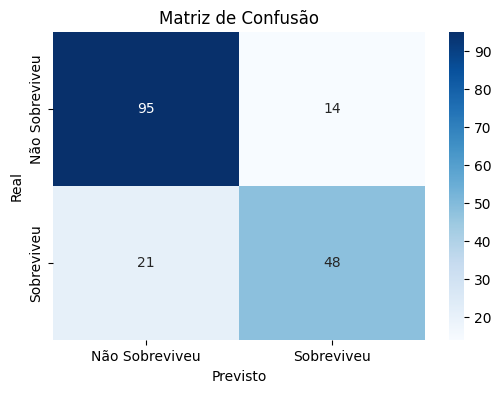


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       109
           1       0.77      0.70      0.73        69

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178


6. IMPORTÂNCIA DAS VARIÁVEIS

Importância das features:
  feature   importance
0     Sex  6859.860755
1    Fare  5208.680740
2     Age  4821.161593
3  Pclass  2514.564160


C:\Users\llays\AppData\Local\Temp\ipykernel_21560\563278291.py:181: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



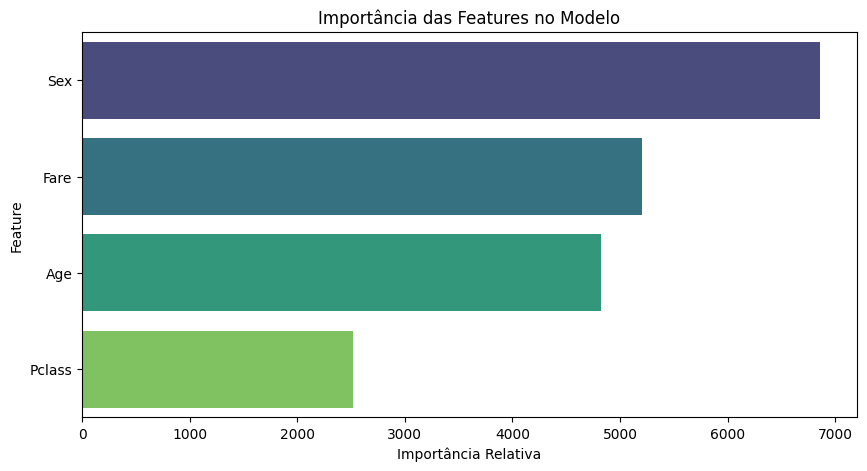

In [21]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# 1. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================

print("="*50)
print("1. CARREGANDO E PREPARANDO OS DADOS")
print("="*50)

# Carregar dataset de exemplo (Titanic)
print("\nCarregando dataset Titanic...")
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
print(f"\nDimensões do dataset: {data.shape}")
print("\nPrimeiras 5 linhas:")
print(data.head())

# Pré-processamento básico
print("\nRealizando pré-processamento...")
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Selecionar colunas relevantes
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Survived']
data = data[features].dropna()

print("\nDados após pré-processamento:")
print(f"- Total de registros: {len(data)}")
print(f"- Proporção de sobreviventes: {data['Survived'].mean():.2%}")
print("\nEstatísticas descritivas:")
print(data.describe())

# ==============================================
# 2. DIVISÃO DOS DADOS EM TREINO E TESTE
# ==============================================

print("\n" + "="*50)
print("2. DIVIDINDO OS DADOS EM TREINO E TESTE")
print("="*50)

# Dividir em features e target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Mantém a proporção de classes
)

print(f"\nDimensões dos conjuntos:")
print(f"- Treino: {X_train.shape[0]} amostras")
print(f"- Teste: {X_test.shape[0]} amostras")
print(f"\nProporção de classes no treino: {y_train.mean():.2%}")
print(f"Proporção de classes no teste: {y_test.mean():.2%}")

# ==============================================
# 3. CONFIGURAÇÃO DO MODELO AUTOML
# ==============================================

print("\n" + "="*50)
print("3. CONFIGURANDO O LIGHTAUTOML")
print("="*50)

# Definir a tarefa (classificação binária)
task = Task('binary')
print("\nTarefa definida: Classificação Binária")

# Parâmetros para o AutoML
timeout = 300  # 5 minutos para treinamento
cpu_limit = 4  # Limite de CPUs
algorithms = ['lgb', 'lgb_tuned', 'cb', 'cb_tuned']

print("\nConfiguração do AutoML:")
print(f"- Tempo máximo: {timeout} segundos")
print(f"- CPUs utilizadas: {cpu_limit}")
print(f"- Algoritmos: {algorithms}")

# Configurar o modelo AutoML
automl = TabularAutoML(
    task=task,
    timeout=timeout,
    cpu_limit=cpu_limit,
    general_params={
        'use_algos': [algorithms],  # Algoritmos específicos
    },
    reader_params={
        'cv': 5,               # Validação cruzada com 5 folds
        'random_state': 42     # Semente para reprodutibilidade
    }
)

# ==============================================
# 4. TREINAMENTO DO MODELO
# ==============================================

print("\n" + "="*50)
print("4. TREINANDO O MODELO")
print("="*50)

# Preparar dados no formato correto para o LightAutoML
train_data = pd.concat([X_train, y_train], axis=1)

print("\nIniciando treinamento...")
oof_pred = automl.fit_predict(
    train_data, 
    roles={'target': 'Survived'},  # Especifica a variável target
    verbose=1  # Mostra progresso durante o treinamento
)

print("\nTreinamento concluído!")

# ==============================================
# 5. AVALIAÇÃO DO MODELO
# ==============================================

print("\n" + "="*50)
print("5. AVALIANDO O MODELO")
print("="*50)

# Fazer previsões no conjunto de teste
test_pred = automl.predict(X_test)
pred_labels = test_pred.data[:, 0].round()  # Converte probabilidades em classes

# Métricas de avaliação
accuracy = accuracy_score(y_test, pred_labels)
conf_matrix = confusion_matrix(y_test, pred_labels)
class_report = classification_report(y_test, pred_labels)

print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")

print("\nMatriz de Confusão:")
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print("\nRelatório de Classificação:")
print(class_report)

# ==============================================
# 6. ANÁLISE DE IMPORTÂNCIA DAS FEATURES
# ==============================================

print("\n" + "="*50)
print("6. IMPORTÂNCIA DAS VARIÁVEIS")
print("="*50)

try:
    # Obter importância das features
    feature_importances = automl.get_feature_scores('fast')
    
    # Verificar a estrutura retornada (seu caso específico)
    if isinstance(feature_importances, pd.DataFrame):
        # Renomear colunas para formato padrão (se necessário)
        feature_importances.columns = ['feature', 'importance']
        
        # Ordenar por importância
        feature_importances = feature_importances.sort_values('importance', ascending=False)
        
        print("\nImportância das features:")
        print(feature_importances)
        
        # Plotar importância
        plt.figure(figsize=(10,5))
        sns.barplot(x='importance', y='feature', 
                   data=feature_importances, 
                   palette='viridis')
        plt.title('Importância das Features no Modelo')
        plt.xlabel('Importância Relativa')
        plt.ylabel('Feature')
        plt.show()
        
except Exception as e:
    print(f"\nErro ao obter importância das features: {str(e)}")
    print("\nVocê pode tentar visualizar a importância diretamente do modelo:")
    
    try:
        # Tentativa alternativa para modelos baseados em árvores
        if hasattr(automl.model, 'feature_importances_'):
            importances = automl.model.feature_importances_
            features = X_train.columns
            
            importance_df = pd.DataFrame({
                'feature': features,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(importance_df)
            
            plt.figure(figsize=(10,5))
            sns.barplot(x='importance', y='feature', 
                       data=importance_df, 
                       palette='viridis')
            plt.title('Importância das Features (Método Alternativo)')
            plt.xlabel('Importância Relativa')
            plt.ylabel('Feature')
            plt.show()
    except Exception as alt_e:
        print(f"\nTambém falhou ao tentar método alternativo: {str(alt_e)}")

1. CARREGANDO E PREPARANDO OS DADOS

Carregando dataset PNS...

Dimensões do dataset: (293726, 1087)

Primeiras 5 linhas:
   V0001    V0024    UPA_PNS  V0006_PNS  V0015  V0020  V0022  V0026  V0031  \
0     11  1110011  110000016          1      1   2019    6.0      1      1   
1     11  1110011  110000016          1      1   2019    6.0      1      1   
2     11  1110011  110000016          1      1   2019    6.0      1      1   
3     11  1110011  110000016          1      1   2019    6.0      1      1   
4     11  1110011  110000016          1      1   2019    6.0      1      1   

   V0025A  ...  VDE002  VDE014  VDF002  VDF003  VDF004  VDL001  VDM001  \
0     1.0  ...     1.0     6.0  2098.0   350.0     2.0     NaN     NaN   
1     0.0  ...     NaN     NaN  2098.0   350.0     2.0     NaN     NaN   
2     0.0  ...     1.0     4.0  2098.0   350.0     2.0     NaN     NaN   
3     9.0  ...     NaN     NaN  2098.0   350.0     2.0     NaN     NaN   
4     9.0  ...     NaN     NaN  2098.0 

Optimization Progress:   1%|          | 1/101 [00:02<03:32,  2.12s/it, best_trial=0, best_value=1]

[09:20:15] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost completed
[09:20:15] Start fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ...


[09:20:26] Fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost finished. score = 1.0
[09:20:26] Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost fitting and predicting completed
[09:20:26] Time left 46.87 secs

[09:20:26] Layer 1 training completed.

[09:20:26] Blending: optimization starts with equal weights. Score = 1.0000000
[09:20:27] Blending: no improvements for score. Terminated.

[09:20:27] Blending: best score = 1.0000000, best weights = [0.33333334 0.33333334 0.33333334]
[09:20:27] Automl preset training completed in 254.44 seconds

[09:20:27] Model description:
Final prediction for new objects (level 0) = 
	 0.33333 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LightGBM) +
	 0.33333 * (5 averaged models Lvl_0_Pipe_0_Mod_2_CatBoost) +
	 0.33333 * (5 averaged models Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost) 


Treinamento concluído!

5. AVALIANDO O MODELO


c:\USERS\LLAYS\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\USERS\LLAYS\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\USERS\LLAYS\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Acurácia no conjunto de teste: 0.9479

Matriz de Confusão:


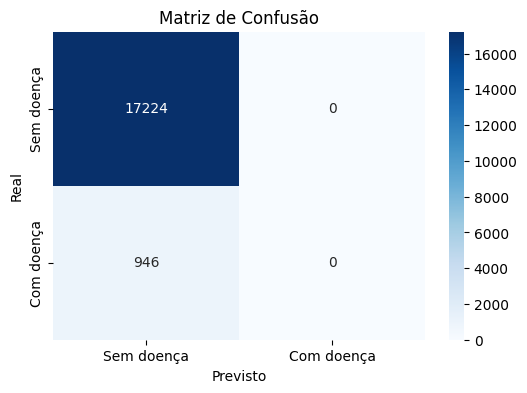


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     17224
         1.0       0.00      0.00      0.00       946

    accuracy                           0.95     18170
   macro avg       0.47      0.50      0.49     18170
weighted avg       0.90      0.95      0.92     18170


6. IMPORTÂNCIA DAS VARIÁVEIS

Importância das features:
  feature    importance
0  Q06307  41388.199219


C:\Users\llays\AppData\Local\Temp\ipykernel_28228\1243686553.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature',


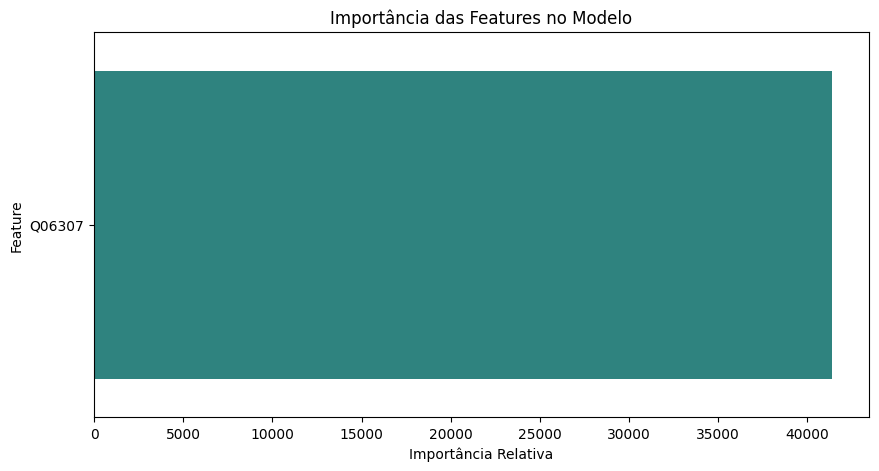

In [9]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# 1. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================

print("="*50)
print("1. CARREGANDO E PREPARANDO OS DADOS")
print("="*50)

# Carregar dataset PNS
print("\nCarregando dataset PNS...")
data = pd.read_csv('../Bases/Originais/pns2019.csv')
print(f"\nDimensões do dataset: {data.shape}")
print("\nPrimeiras 5 linhas:")
print(data.head())

# Pré-processamento básico
print("\nRealizando pré-processamento...")

# Mapeando a variável-alvo para 0 e 1
data['Q06306'] = data['Q06306'].map({1: 1, 2: 0})  # 1 = tem doença do coração, 2 = não tem

# Remover linhas com target ausente
data = data.dropna(subset=['Q06306'])

# Selecionar apenas colunas numéricas e categóricas válidas (AutoML lida com isso)
print("\nDados após preparação mínima:")
print(f"- Total de registros: {len(data)}")
print(f"- Proporção de pessoas com doença do coração: {data['Q06306'].mean():.2%}")
print("\nEstatísticas descritivas:")
print(data.describe(include='all'))

# ==============================================
# 2. DIVISÃO DOS DADOS EM TREINO E TESTE
# ==============================================

print("\n" + "="*50)
print("2. DIVIDINDO OS DADOS EM TREINO E TESTE")
print("="*50)

# Dividir em features e target
X = data.drop('Q06306', axis=1)
y = data['Q06306']

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"\nDimensões dos conjuntos:")
print(f"- Treino: {X_train.shape[0]} amostras")
print(f"- Teste: {X_test.shape[0]} amostras")
print(f"\nProporção de classes no treino: {y_train.mean():.2%}")
print(f"Proporção de classes no teste: {y_test.mean():.2%}")

# ==============================================
# 3. CONFIGURAÇÃO DO MODELO AUTOML
# ==============================================

print("\n" + "="*50)
print("3. CONFIGURANDO O LIGHTAUTOML")
print("="*50)

task = Task('binary')
print("\nTarefa definida: Classificação Binária")

timeout = 300
cpu_limit = 4
algorithms = ['lgb', 'lgb_tuned', 'cb', 'cb_tuned']

print("\nConfiguração do AutoML:")
print(f"- Tempo máximo: {timeout} segundos")
print(f"- CPUs utilizadas: {cpu_limit}")
print(f"- Algoritmos: {algorithms}")

automl = TabularAutoML(
    task=task,
    timeout=timeout,
    cpu_limit=cpu_limit,
    general_params={
        'use_algos': [algorithms],
    },
    reader_params={
        'cv': 5,
        'random_state': 42
    }
)

# ==============================================
# 4. TREINAMENTO DO MODELO
# ==============================================

print("\n" + "="*50)
print("4. TREINANDO O MODELO")
print("="*50)

train_data = pd.concat([X_train, y_train], axis=1)

print("\nIniciando treinamento...")
oof_pred = automl.fit_predict(
    train_data, 
    roles={'target': 'Q06306'}, 
    verbose=1
)

print("\nTreinamento concluído!")

# ==============================================
# 5. AVALIAÇÃO DO MODELO
# ==============================================

print("\n" + "="*50)
print("5. AVALIANDO O MODELO")
print("="*50)

test_pred = automl.predict(X_test)
pred_labels = test_pred.data[:, 0].round()

accuracy = accuracy_score(y_test, pred_labels)
conf_matrix = confusion_matrix(y_test, pred_labels)
class_report = classification_report(y_test, pred_labels)

print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")

print("\nMatriz de Confusão:")
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem doença', 'Com doença'],
            yticklabels=['Sem doença', 'Com doença'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print("\nRelatório de Classificação:")
print(class_report)

# ==============================================
# 6. ANÁLISE DE IMPORTÂNCIA DAS FEATURES
# ==============================================

print("\n" + "="*50)
print("6. IMPORTÂNCIA DAS VARIÁVEIS")
print("="*50)

try:
    feature_importances = automl.get_feature_scores('fast')
    
    if isinstance(feature_importances, pd.DataFrame):
        feature_importances.columns = ['feature', 'importance']
        feature_importances = feature_importances.sort_values('importance', ascending=False)
        
        print("\nImportância das features:")
        print(feature_importances)
        
        plt.figure(figsize=(10,5))
        sns.barplot(x='importance', y='feature', 
                   data=feature_importances, 
                   palette='viridis')
        plt.title('Importância das Features no Modelo')
        plt.xlabel('Importância Relativa')
        plt.ylabel('Feature')
        plt.show()
        
except Exception as e:
    print(f"\nErro ao obter importância das features: {str(e)}")
    
    try:
        if hasattr(automl.model, 'feature_importances_'):
            importances = automl.model.feature_importances_
            features = X_train.columns
            
            importance_df = pd.DataFrame({
                'feature': features,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(importance_df)
            
            plt.figure(figsize=(10,5))
            sns.barplot(x='importance', y='feature', 
                       data=importance_df, 
                       palette='viridis')
            plt.title('Importância das Features (Método Alternativo)')
            plt.xlabel('Importância Relativa')
            plt.ylabel('Feature')
            plt.show()
    except Exception as alt_e:
        print(f"\nTambém falhou ao tentar método alternativo: {str(alt_e)}")